In [2]:
#importing libraries

import pandas as pd

In [4]:
#importing dataset

data = pd.read_csv('Downloads\heart.csv')

In [6]:
#taking care of missing values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#taking care of duplicate values

data_dup=data.duplicated().any()

In [8]:
data_dup

True

In [9]:
#true means that there are duplicates in the data..so now lets drop them

data = data.drop_duplicates()

In [10]:
data_dup=data.duplicated().any()

In [11]:
data_dup  #if false then all the duplicates have been removed

False

In [15]:
#data processing

#creating two list to store 1.categorical data 2.numerical data
#cont is constant value
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
        
#by this the numerical and categorical values are seperated

In [16]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [18]:
#encoding of categorical data

cate_val


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [19]:
data['cp'].unique()
#cp is chest pain 

array([0, 1, 2, 3], dtype=int64)

In [21]:
#cp column will be divided into 4 columns as there are four unique values

cate_val.remove('sex')
cate_val.remove('target')
#removing this because it already conains 0 and 1

data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [22]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [28]:
#feature scaling

from sklearn.preprocessing import StandardScaler

In [35]:
st = StandardScaler()
data[cont_val]=st.fit_transform(data[cont_val])

In [36]:
data.head() #now all values are in same range

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [38]:
#splitting dataset into training set and test set

X=data.drop('target',axis=1)

In [39]:
y=data['target']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,0,0,0,0,...,1,1,0,0,1,0,0,0,0,1
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [43]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [44]:
#logistic regression

data.head()

#the target is categorical the one algorithm with best accuracy we will use 

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred1=log.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [58]:
#Support Vector Classifier

from sklearn import svm

In [59]:
#SVS is support vector classifier
svm=svm.SVC()

In [60]:
svm.fit(X_train,y_train)

SVC()

In [61]:
y_pred2=svm.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [65]:
#KNeighbours Classifier

from sklearn.neighbors import KNeighborsClassifier


In [67]:
knn = KNeighborsClassifier()

In [68]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [69]:
y_pred3=knn.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [71]:
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier()
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [72]:
score

[0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [78]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8032786885245902

In [79]:
#NON LINEAR MACHINE LEARNING ALGOITHM
#we do not need preprocessing ie no need of encoding and feature scaling

data = pd.read_csv('Downloads\heart.csv')


In [80]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [81]:
#removimg duplicate values

data = data.drop_duplicates()

In [82]:
data.shape

(302, 14)

In [83]:
X=data.drop('target',axis=1)
y=data['target']

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [85]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt=DecisionTreeClassifier()

In [87]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [90]:
y_pred4=dt.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred4)

0.7704918032786885

In [93]:
#RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier


In [94]:
rf = RandomForestClassifier()


In [95]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
y_pred5=rf.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

In [98]:
#GRADIENT BOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gbc=GradientBoostingClassifier()

In [100]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [101]:
y_pred6=gbc.predict(X_test)

In [102]:
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [105]:
#BAR for each classifier to compare the accuracy

final_data=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                         'ACC':[accuracy_score(y_test,y_pred1),
                        accuracy_score(y_test,y_pred2),
                        accuracy_score(y_test,y_pred3),
                        accuracy_score(y_test,y_pred4),
                        accuracy_score(y_test,y_pred5),
                        accuracy_score(y_test,y_pred6)]})

In [106]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.770492
4,RF,0.836066
5,GB,0.803279


In [110]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

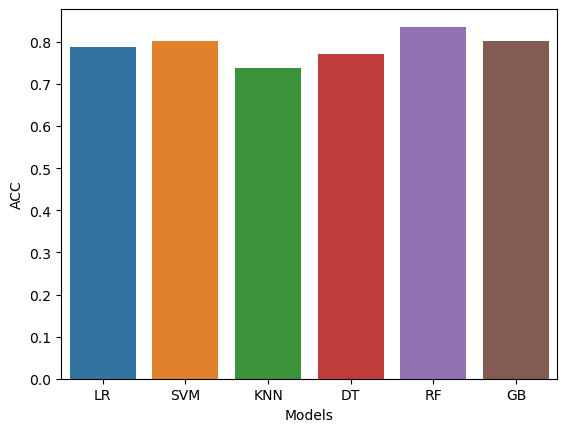

In [112]:


sns.barplot(x=final_data['Models'], y=final_data['ACC'])


In [115]:
#Training our data on Random Access Classifier as it is providing best accuracy


X=data.drop('target',axis=1)
y=data['target']


In [116]:
X.shape

(302, 13)

In [118]:
from sklearn.ensemble import RandomForestClassifier


In [121]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [122]:
#PRediction on new data

import pandas as pd

In [123]:
new_data=pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [124]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [127]:
p=rf.predict(new_data)
if p[0]==0:
    print("No disease")
else:
    print("Disease")

No disease


In [128]:
import joblib

In [129]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [130]:
model=joblib.load('model_joblib_heart')

In [131]:
model.predict(new_data)

array([0], dtype=int64)

In [ ]:
#GUI FOR PREDICTION

In [134]:
from tkinter import *
import joblib

In [152]:
from tkinter import Tk, Label, Entry, Button, mainloop
import joblib

def show_entry_fields():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = int(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())

    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
    
    if result == 0:
        Label(master, text="No HEART DISEASE").grid(row=31)
    else:
        Label(master, text="Possibility of heart disease").grid(row=31)

master = Tk()
master.title("Heart Disease Prediction System")

label = Label(master, text="Heart Disease Prediction System", bg="black", fg="white")
label.grid(row=0, columnspan=2)

Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male or Female").grid(row=2)
Label(master, text="Enter value of CP").grid(row=3)
Label(master,text="Enter value of trestbps").grid(row=4)
Label(master,text="Enter value of chol").grid(row=5)
Label(master,text="Enter value of fbs").grid(row=6)
Label(master,text="Enter value for restecg").grid(row=7)
Label(master,text="Enter value of thalach").grid(row=8)
Label(master,text="Enter value of exang").grid(row=9)
Label(master,text="Enter value of oldpeak").grid(row=10)
Label(master,text="Enter value of slope").grid(row=11)
Label(master,text="Enter value of ca").grid(row=12)
Label(master,text="Enter value of thal").grid(row=13)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()


C:\Users\SANDESH\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\SANDESH\anaconda3\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\SANDESH\AppData\Local\Temp\ipykernel_16400\2631190092.py", line 6, in show_entry_fields
    p2 = int(e2.get())
ValueError: invalid literal for int() with base 10: 'Female'
